# Pymaceuticals Inc.
---

### Analysis

Potential Outliers:

- Potential outliers were identified for the Capomulin and Ramicane regimens, but not for Infubinol and Ceftamin. This suggests that there may be extreme data points for tumor volume in the Capomulin and Ramicane treatment groups.
- Capomulin had two potential outliers with tumor volumes of approximately 25.47 and 23.34 cubic millimeters.
- Ramicane had one potential outlier with a tumor volume of approximately 22.05 cubic millimeters.

Correlation and Linear Regression:

- The correlation coefficient of 0.8344 indicates a strong positive correlation between mouse weight and average observed tumor volume within the Capomulin regimen.
- This suggests that as mouse weight increases, the average tumor volume tends to increase as well.
- The linear regression model equation "y = 0.96x + 21.49" provides a mathematical representation of this positive correlation.
- The slope (0.96) suggests that for each additional gram of mouse weight, the average tumor volume is expected to increase by 0.96 cubic millimeters.
- The intercept (21.49) is the estimated average tumor volume when the mouse weight is zero, although this value may not have a meaningful real-world interpretation since mouse weight cannot be zero.

Treatment Regimens:

- The analysis includes data from various treatment regimens such as Capomulin, Ramicane, Infubinol, and Ceftamin, each with its own characteristics.
- While potential outliers were identified for Capomulin and Ramicane, no potential outliers were found for Infubinol and Ceftamin, indicating variations in tumor volume within these regimens.

Data Quality:

- The availability of data on potential outliers, correlations, and regression models contributes to a comprehensive understanding of the relationship between mouse weight and tumor volume within specific treatment regimens.

Further Analysis:

- Further analysis may involve exploring the clinical implications of the identified outliers, investigating the effects of different treatment regimens, or studying additional factors that influence tumor volume.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = r"C:\Users\chand\OneDrive\Desktop\InstaDataHelp\15-10-23\Starter_Code\Starter_Code\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = r"C:\Users\chand\OneDrive\Desktop\InstaDataHelp\15-10-23\Starter_Code\Starter_Code\Pymaceuticals\data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
# Checking the number of mice.
len(df["Mouse ID"].unique())

249

In [23]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
subset_df = df[['Mouse ID', 'Timepoint']]
duplicate_rows = subset_df[subset_df.duplicated(keep=False)]
duplicate_mice = duplicate_rows['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [24]:
# Optional: Get all the data for the duplicate mouse ID. 
df[df['Mouse ID'].isin(duplicate_mice)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = df[df["Mouse ID"] != 'g989']
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [26]:
# Checking the number of mice in the clean DataFrame.
len(df["Mouse ID"].unique())

248

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_data = df.groupby('Drug Regimen')

summary_stats = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std'])
sem = grouped_data['Tumor Volume (mm3)'].apply(lambda x: np.std(x, ddof=0) / np.sqrt(len(x)))
summary_stats['SEM'] = sem
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Deviation'
})
summary_stats.reset_index(inplace=True)
summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.328629
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.468499
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.490851
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.602252
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.594860
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.579722
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.542490
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320250
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.571526
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.514977


In [35]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)
summary_stats_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

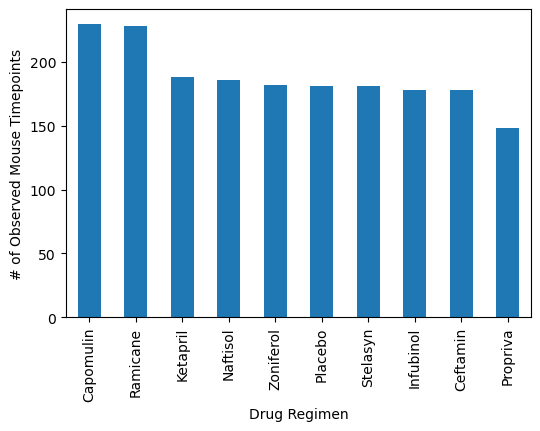

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = df['Drug Regimen'].value_counts()

# Create a bar plot
regimen_counts.plot(kind='bar', figsize=(6, 4))
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

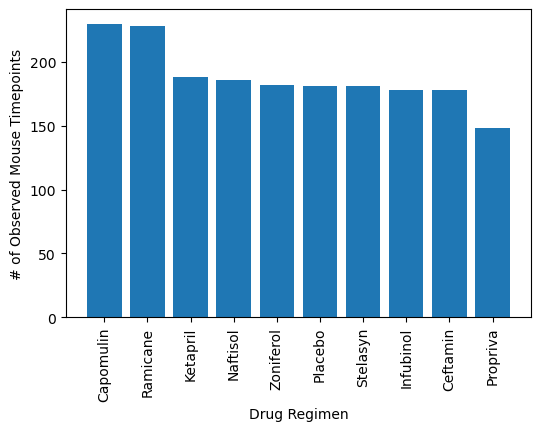

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = df['Drug Regimen'].value_counts()

regimen_names = regimen_counts.index
count_values = regimen_counts.values
plt.figure(figsize=(6, 4))
plt.bar(regimen_names, count_values)

# Set labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

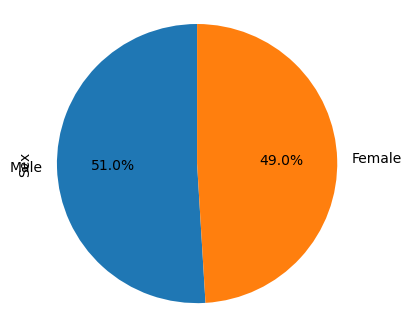

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = df['Sex'].value_counts()
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(4, 4))
plt.axis('equal')  # Equal aspect ratio ensures that the pie is circular
plt.show()

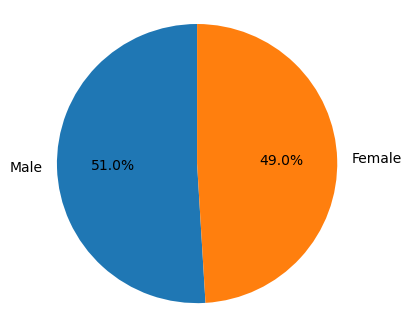

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = df['Sex'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = df.groupby('Mouse ID')['Timepoint'].max()
last_timepoints_df = pd.DataFrame(last_timepoints).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoints_df, df, on=['Mouse ID', 'Timepoint'], how='inner')

# Create a DataFrame with Mouse ID and the corresponding last timepoint
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Step 2: Merge this group DataFrame with the original DataFrame
final_tumor_volume = merged_data[merged_data['Drug Regimen'].isin(treatment_regimens)]

# Filter the data to include only the specified treatment regimens
final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [62]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
potential_outliers = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows that contain mice on the current treatment
    treatment_data = df[df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data.append(treatment_data)
    
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    potential_outliers[treatment] = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    
for treatment, outliers in potential_outliers.items():
    if not outliers.empty:
        print(f"{treatment}'s potential outliers:{outliers}")
    else:
        print(f"{treatment} has no potential outliers.")

Capomulin's potential outliers:18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers:9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol has no potential outliers.
Ceftamin has no potential outliers.


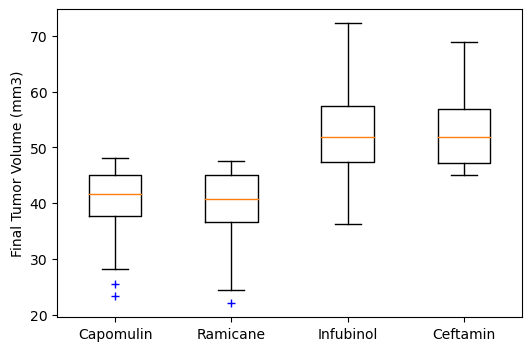

In [64]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a list of tumor volume data for each treatment
tumor_vol_data = [df[df['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments]

# Create a box plot
plt.figure(figsize=(6, 4))
plt.boxplot(tumor_vol_data, labels=treatments, sym='b+')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

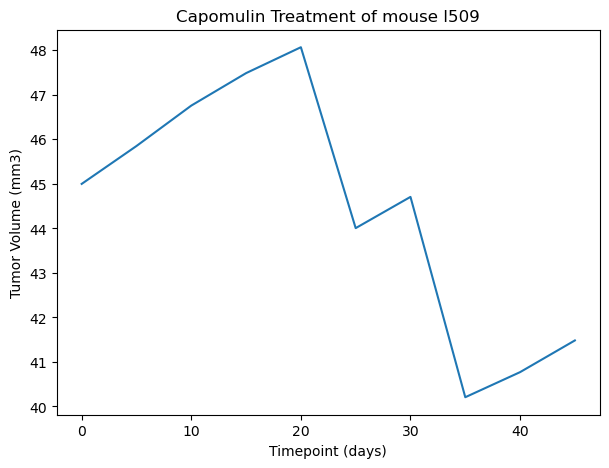

In [74]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'

capomulin_mouse_data = df[(df['Drug Regimen'] == 'Capomulin') & (df['Mouse ID'] == mouse_id)]
plt.figure(figsize=(7, 5))
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], linestyle='-')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment of mouse {mouse_id}')
plt.show()

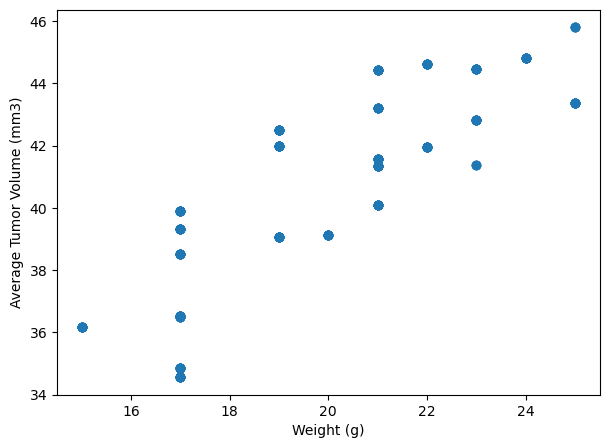

In [76]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

average_tumor_volume_df = pd.DataFrame(average_tumor_volume).reset_index()
merged_data = pd.merge(df, average_tumor_volume_df, on='Mouse ID', suffixes=('', '_avg'))
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']
plt.figure(figsize=(7, 5))
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)_avg'], marker='o')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

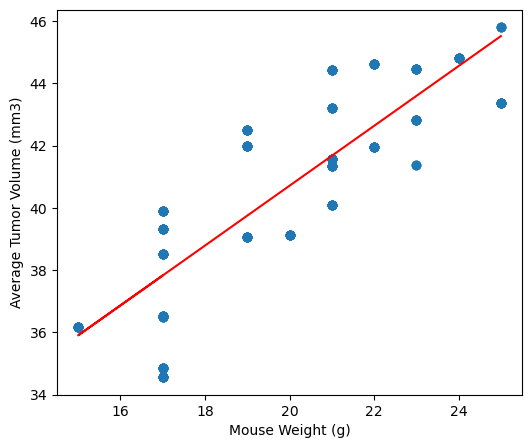

Correlation Coefficient: 0.8344
Linear Regression: y = 0.96x + 21.49


In [85]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
average_tumor_volume_df = pd.DataFrame(average_tumor_volume).reset_index()
merged_data = pd.merge(df, average_tumor_volume_df, on='Mouse ID', suffixes=('', '_avg'))
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']
correlation_coefficient = st.pearsonr(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)_avg'])[0]

slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)_avg'])

plt.figure(figsize=(6, 5))
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)_avg'], marker='o')
regress_line = slope * capomulin_data['Weight (g)'] + intercept
plt.plot(capomulin_data['Weight (g)'], regress_line, color='red')

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

# Output the correlation coefficient and linear regression results
print(f'Correlation Coefficient: {round(correlation_coefficient,4)}')
print(f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}')